In [210]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
from itertools import combinations
from neurotools.io.files import load_embedding_model
from ast import literal_eval
%matplotlib inline

In [85]:
emb, word2rank_dict = load_embedding_model('005_en_in_commoncrawl_v1_20180330.bin')

In [86]:
def get_average_vector(words, emb):
    """
        Average the word vectors of a list of words.
    """
    words_in_emb = [emb[word] for word in words if word in emb.vocab.keys()]
    total = np.sum(words_in_emb, axis=0)
    count = len(words_in_emb)
    return total / count

In [87]:
def cosine_similarity(a,b):
    """
        Compute the cosine similarity of a and b.
    """
    return np.dot(a,b) / ( (np.dot(a,a) **.5) * (np.dot(b,b) ** .5) )

In [88]:
def get_similarity_with_dimensions(row, dims):
    """
        Get similarity of row's word vector and every dimension.
        row : row of the movie dataframe
        dimensions : dataframe containing Neuroflash dimensions
    """
    for k in range(dims['Dimension'].shape[0]):
        name = str(dims['Dimension'].iloc[k])
        # define a new column for the cosine similarity of dimension k and the post text
        row[name] = cosine_similarity(row['wv'], dims['wv'].iloc[k])
    return row

In [150]:
dimensions = pd.read_csv('csv/dimensions.csv')

In [151]:
dimensions = dimensions[dimensions['Dimension'].str.startswith('nf')]

In [152]:
dimensions['tokens'] = dimensions['Content'].str.lower().str.replace(r'[^a-z ]', '').str.split()

In [153]:
dimensions['wv'] = dimensions['tokens'].map(lambda x: get_average_vector(x, emb))

In [154]:
dimensions = dimensions.apply(lambda x: get_similarity_with_dimensions(x, dimensions), axis=1)

In [155]:
dimensions = dimensions.set_index('Dimension')

In [95]:
dimensions = dimensions[[x for x in dimensions.columns if 'nf_' in x]]

In [96]:
dimensions.index = [x[3:].replace('_', ' ') for x in dimensions.index]
dimensions.columns = [x[3:].replace('_', ' ') for x in dimensions.columns]

In [116]:
pairs = list(combinations(range(4), 2))

In [143]:
def get_average_similarity(row):
    tot = 0
    for pair in pairs:
        tot += abs(dimensions.loc[row[pair[0]], row[pair[1]]])
    return tot

In [144]:
quadruples = pd.DataFrame(list(combinations(list(dimensions.columns), 4)))

In [145]:
quadruples['av_sim'] = quadruples.apply(get_average_similarity, axis=1)

In [146]:
dimensions.loc['fresh', 'natural']

0.21617564807596754

In [147]:
quadruples.sort_values('av_sim')

,0,1,2,3,av_sim
888,fascination,healthy positive,winner,new,0.362447
467,expensive,fascination,healthy positive,winner,0.377990
481,expensive,fascination,winner,new,0.424459
957,fascination,winner,natural,new,0.427864
602,expensive,healthy positive,winner,new,0.472750
456,expensive,fascination,fresh,winner,0.507194
671,expensive,winner,natural,new,0.515119
480,expensive,fascination,winner,natural,0.532028
600,expensive,healthy positive,winner,modern,0.541232
678,expensive,winner,new,pleasant,0.543072


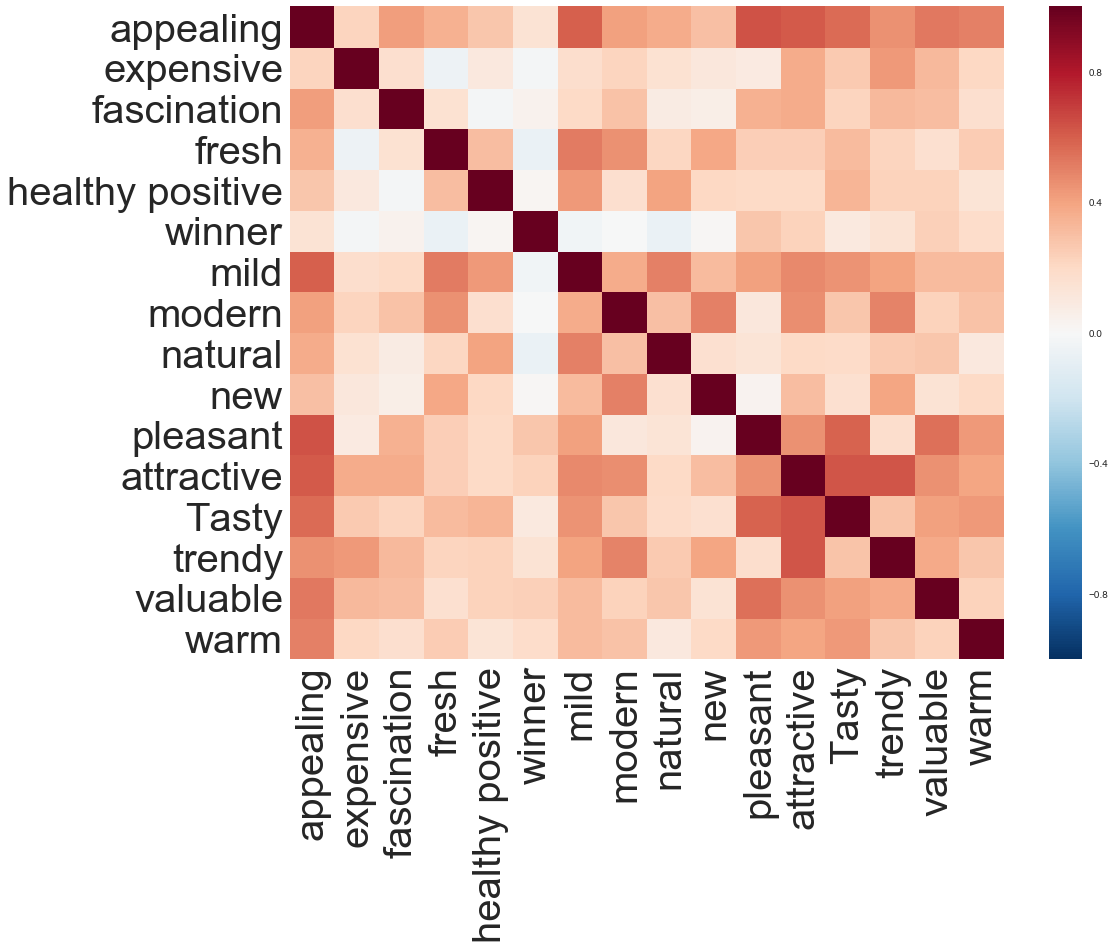

In [83]:
plt.figure(figsize=(16,12))
sns.heatmap(dimensions)
plt.xticks(size=40, rotation = 90);
plt.yticks(size=40, rotation = 0);
plt.savefig('plot/nf_dimension_hm.png', bbox_inches='tight')

In [164]:
def convert_to_cols(row):
    for i in range(300):
        row['wv_' + str(i)] = row['wv'][i]
    return 

In [170]:
wv_rep=dimensions.apply(convert_to_cols, axis=1)

In [172]:
wv_rep = wv_rep[[x for x in wv_rep.columns if 'wv_' in x]]

In [173]:
wv_rep

,wv_0,wv_1,wv_2,wv_3,wv_4,wv_5,wv_6,wv_7,wv_8,wv_9,...,wv_290,wv_291,wv_292,wv_293,wv_294,wv_295,wv_296,wv_297,wv_298,wv_299
Dimension,,,,,,,,,,,,,,,,,,,,,
nf_appealing,0.305218,1.247661,-0.992285,-1.737711,-0.152053,1.001622,0.020428,1.182848,-0.098303,0.190932,...,-1.774776,0.815718,3.426882,-0.849778,0.762726,-2.361871,-0.293853,0.202169,-0.822701,-1.393767
nf_expensive,1.068425,0.278479,0.549829,-0.498943,0.805729,-0.949098,0.009743,-0.907780,-1.134350,-1.551609,...,-1.240627,-0.964553,1.234657,0.608754,-1.262582,-0.031588,3.312811,3.026581,2.080693,-0.938950
nf_fascination,-0.202709,-0.136545,0.307482,-1.327064,-0.296612,0.440663,-1.362939,1.983124,0.876930,-1.031214,...,1.044806,4.002857,1.697627,2.249056,1.170802,-0.701973,0.173295,0.347968,0.635733,-3.385280
nf_fresh,-0.465296,1.311848,-1.188426,0.205758,-1.137881,0.701477,0.685040,2.066559,0.307958,2.360874,...,-1.865098,1.637022,1.263637,0.719736,1.429597,-0.699705,-1.586301,-1.866433,-1.116820,-0.868849
nf_healthy_positive,0.157234,3.754688,-2.790185,-0.837267,-0.333101,1.605915,1.488577,0.090814,-1.450121,0.700995,...,-0.627754,-2.008286,1.873640,-0.638177,-1.314192,-2.207837,0.997263,-0.166298,-0.664550,-1.158388
nf_winner,-0.408222,1.466363,-1.189739,-2.703210,-0.610789,0.105951,0.737548,0.383057,-1.980884,-1.435606,...,-1.790596,-2.042512,-2.061029,0.772189,1.049517,1.544241,0.735013,1.815507,0.360741,1.659510
nf_mild,-0.178969,2.159864,-1.304097,-1.282874,-0.862484,1.200690,0.647044,0.281281,-0.291658,1.707205,...,-0.918470,-0.446111,2.546059,0.770480,0.383831,-1.829768,-0.203548,-0.011445,-0.674902,-0.867178
nf_modern,1.163818,2.476700,0.099837,0.106302,0.529750,-1.975841,-0.559179,0.282146,-0.422057,1.408041,...,-2.163804,0.547409,1.580951,0.020641,2.450418,-0.879885,0.275110,-0.926856,-3.069175,-2.817204
nf_natural,1.197416,1.412060,-0.274207,-1.610521,0.203891,-0.339791,0.702302,0.816318,1.127262,0.451140,...,-0.118008,-1.582024,2.095003,-0.526383,0.063605,-0.955708,0.841001,-0.649900,-1.358489,-0.314287


In [176]:
km = KMeans(4)

In [178]:
km.fit(wv_rep)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [215]:
emb.similar_by_vector(km.cluster_centers_[0])

[('truly', 0.6116118431091309),
 ('beautiful', 0.6113249063491821),
 ('charm', 0.5858138203620911),
 ('sensual', 0.5852909088134766),
 ('attractive', 0.5830949544906616),
 ('allure', 0.5810573101043701),
 ('naturally', 0.5724059343338013),
 ('sensuality', 0.5699467658996582),
 ('perfect', 0.5698089003562927),
 ('seductive', 0.5693069696426392)]

In [216]:
emb.similar_by_vector(km.cluster_centers_[1])

[('new', 0.8225430250167847),
 ('model', 0.5288186073303223),
 ('fresh', 0.49205338954925537),
 ('design', 0.3614005744457245),
 ('youthful', 0.3573722243309021),
 ('conventional', 0.3495592772960663),
 ('different', 0.3472047448158264),
 ('hybrid', 0.3470095098018646),
 ('restyle', 0.3426544666290283),
 ('unique', 0.33775821328163147)]

In [217]:
emb.similar_by_vector(km.cluster_centers_[2])

[('winner', 0.775343120098114),
 ('medal', 0.6765660047531128),
 ('win', 0.6320600509643555),
 ('champion', 0.6301171779632568),
 ('award', 0.6195024847984314),
 ('championship', 0.5740487575531006),
 ('deservedly', 0.5589097142219543),
 ('covet', 0.5534384846687317),
 ('accolade', 0.5534269213676453),
 ('champ', 0.5393747687339783)]

In [218]:
emb.similar_by_vector(km.cluster_centers_[3])

[('modern', 0.6455498933792114),
 ('contemporary', 0.6271072626113892),
 ('current', 0.6166353225708008),
 ('fresh', 0.5726754069328308),
 ('evolve', 0.5013354420661926),
 ('modernity', 0.5012394189834595),
 ('traditional', 0.48725005984306335),
 ('aesthetic', 0.46130645275115967),
 ('unique', 0.45948103070259094),
 ('sophisticate', 0.44345471262931824)]

In [208]:
def convert_to_str(row):
    w = '['
    for i in range(300):
        w += str(row[i]) + ', '
    w += ']'
    return w

In [224]:
clustered = pd.DataFrame(pd.DataFrame(km.cluster_centers_).apply(convert_to_str, axis=1).map(literal_eval))

In [229]:
clustered['Dimension'] = ['nf_sensual', 'nf_fresh', 'nf_winner', 'nf_modern']

In [230]:
clustered.columns = ['wv', 'Dimension']

In [231]:
clustered.to_csv('csv/clustered_dims.csv', index=False)

In [233]:
clustered

,wv,Dimension
0,"[0.24479248775885656, 0.9547597502286618, -0.5...",nf_sensual
1,"[-2.3206920623779297, 0.29747605323791504, -0....",nf_fresh
2,"[-0.4082222580909729, 1.4663633108139038, -1.1...",nf_winner
3,"[1.1638178825378418, 2.4766998291015625, 0.099...",nf_modern
